Imputation

Note: In the following code , implementation of imputation has been done and as it was taking lot of time for implementation of knn and svd, we have implemented on subset of the data. Filling has been done on only three colums.

In [1]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.0 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=6ed0c19ce736979701b822090bab1b53cedabcb2301dabef245ecbe4dc544e65
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=af259e5c043aaf48a3e88ff2004b400e3c8a1ecfa34bfe613c78ea483265e783
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('city_hour.csv')

# Display the first few rows of the dataframe
print(df.head())






        City             Datetime  PM2.5  PM10    NO    NO2    NOx  NH3    CO  \
0  Ahmedabad  2015-01-01 01:00:00    NaN   NaN  1.00  40.01  36.37  NaN  1.00   
1  Ahmedabad  2015-01-01 02:00:00    NaN   NaN  0.02  27.75  19.73  NaN  0.02   
2  Ahmedabad  2015-01-01 03:00:00    NaN   NaN  0.08  19.32  11.08  NaN  0.08   
3  Ahmedabad  2015-01-01 04:00:00    NaN   NaN  0.30  16.45   9.20  NaN  0.30   
4  Ahmedabad  2015-01-01 05:00:00    NaN   NaN  0.12  14.90   7.85  NaN  0.12   

      SO2      O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  122.07     NaN      0.0      0.0     0.0  NaN        NaN  
1   85.90     NaN      0.0      0.0     0.0  NaN        NaN  
2   52.83     NaN      0.0      0.0     0.0  NaN        NaN  
3   39.53  153.58      0.0      0.0     0.0  NaN        NaN  
4   32.63     NaN      0.0      0.0     0.0  NaN        NaN  


In [4]:
# Get a summary of the dataset
print(df.describe())
print(df.info())

               PM2.5           PM10             NO            NO2  \
count  534415.000000  384964.000000  562930.000000  562240.000000   
mean       69.878542     123.903036      17.770634      29.493338   
std        75.902082     105.269853      32.597545      29.522700   
min         0.010000       0.010000       0.010000       0.010000   
25%        27.750000      56.880000       3.900000      11.090000   
50%        48.390000      94.950000       8.070000      20.900000   
75%        81.970000     152.920000      16.500000      37.080000   
max       999.990000    1000.000000     499.990000     499.510000   

                 NOx            NH3             CO            SO2  \
count  554377.000000  409997.000000  590705.000000  547491.000000   
mean       32.862864      24.177236       2.255460      14.317319   
std        40.460703      29.470988      11.246177      19.747899   
min         0.000000       0.010000       0.000000       0.010000   
25%        10.690000       8.2900

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


City               0
Datetime           0
PM2.5         140807
PM10          290258
NO            112292
NO2           112982
NOx           120845
NH3           265225
CO             84517
SO2           127731
O3            123615
Benzene       156754
Toluene       212040
Xylene        428837
AQI           125219
AQI_Bucket    125219
dtype: int64


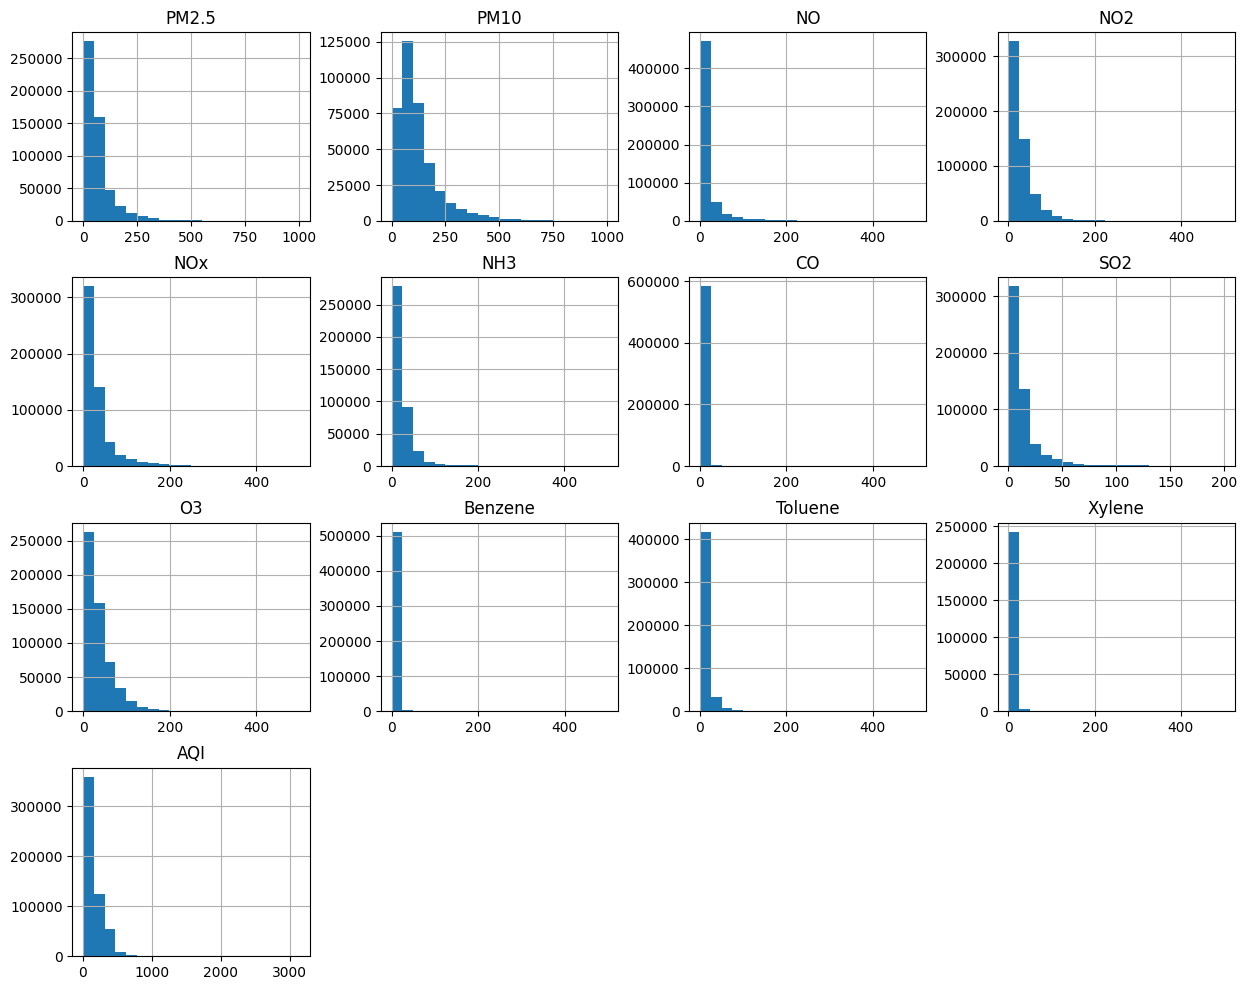

In [6]:
# Data distribution analysis
df.hist(figsize=(15, 12), bins=20)
plt.show()




Now running all the imputation methods on NO, NO2, NOx

In [20]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from fancyimpute import IterativeSVD
from scipy import stats

# Load the dataset
df = pd.read_csv('/content/city_hour.csv')  # Make sure to use the correct path to your CSV file

# Separate dataframes for each imputation
df_zero_imputed = df.copy()
df_mean_imputed = df.copy()
df_median_imputed = df.copy()
df_mode_imputed = df.copy()
df_knn_imputed = df.copy()
df_svd_imputed = df.copy()




zero imputation- replacing missing values with zero

In [21]:

imputer_zero = SimpleImputer(strategy='constant', fill_value=0)
df_zero_imputed[['NO', 'NO2', 'NOx']] = imputer_zero.fit_transform(df_zero_imputed[['NO', 'NO2', 'NOx']])

mean imputation

In [22]:
# Mean imputation
imputer_mean = SimpleImputer(strategy='mean')
df_mean_imputed[['NO', 'NO2', 'NOx']] = imputer_mean.fit_transform(df_mean_imputed[['NO', 'NO2', 'NOx']])

In [39]:
df_mean_imputed.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


Median Imputation (Zero and Mean):

In [23]:
imputer_median = SimpleImputer(strategy='median')
df_median_imputed[['NO', 'NO2', 'NOx']] = imputer_median.fit_transform(df_median_imputed[['NO', 'NO2', 'NOx']])

In [38]:
df_median_imputed.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


knn Imputation

In [36]:
import pandas as pd
from sklearn.impute import KNNImputer

# Load the dataset
df = pd.read_csv('/content/city_hour.csv')
df_subset = df.head(3000).copy()

# Apply KNN imputation on the subset
knn_imputer = KNNImputer(n_neighbors=5)
df_subset_knn_imputed = df_subset.copy()
df_subset_knn_imputed[['NO', 'NO2', 'NOx']] = knn_imputer.fit_transform(df_subset_knn_imputed[['NO', 'NO2', 'NOx']])

# Now you have df_subset_knn_imputed with KNN imputation applied on the subset


In [37]:
df_subset.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


SVD imputation

In [34]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Load the dataset
df = pd.read_csv('/content/city_hour.csv')  # Update the path to your CSV file

# Create a subset of the dataset
df_subset = df.head(3000)[['NO', 'NO2', 'NOx']].copy()

# Apply IterativeImputer on the subset
iterative_imputer = IterativeImputer(max_iter=10, random_state=0)
df_subset_iterative_imputed = iterative_imputer.fit_transform(df_subset.values)

# Create a new DataFrame with the imputed values
df_subset_iterative_imputed = pd.DataFrame(df_subset_iterative_imputed, columns=['NO', 'NO2', 'NOx'])

# Now you have df_subset_iterative_imputed with IterativeImputer applied on the subset



/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [35]:
df_subset.head()

,NO,NO2,NOx
0,1.00,40.01,36.37
1,0.02,27.75,19.73
2,0.08,19.32,11.08
3,0.30,16.45,9.20
4,0.12,14.90,7.85


In [1]:
import numpy as np

# Sample dataset with missing values
data = np.array([[1.2, 2.5, np.nan, 4.1],
                 [2.8, np.nan, 3.9, 4.2],
                 [np.nan, 2.3, 3.5, 4.8],
                 [1.9, 2.1, 3.7, np.nan]])

# Function to perform E-step and M-step manually for a single feature
def impute_missing_values(feature_data):
    # Assume initial parameters for two components
    mean1, std1 = 2.0, 0.5
    mean2, std2 = 3.0, 0.7
    
    # E-step (Expectation Step) for missing value in the third row
    missing_index = np.argwhere(np.isnan(feature_data))
    observed_values = np.delete(feature_data, missing_index)
    likelihood1 = (1 / np.sqrt(2 * np.pi * std1**2)) * np.exp(-(observed_values - mean1)**2 / (2 * std1**2))
    likelihood2 = (1 / np.sqrt(2 * np.pi * std2**2)) * np.exp(-(observed_values - mean2)**2 / (2 * std2**2))
    
    # Assume equal mixing coefficients for simplicity
    mixing_coefficient1 = 0.5
    mixing_coefficient2 = 0.5
    
    # Calculate responsibilities (likelihoods * mixing coefficients)
    responsibility1 = likelihood1 * mixing_coefficient1
    responsibility2 = likelihood2 * mixing_coefficient2
    
    # Normalize responsibilities to obtain probabilities
    total_responsibility = responsibility1 + responsibility2
    prob_component1 = responsibility1 / total_responsibility
    prob_component2 = responsibility2 / total_responsibility
    
    # M-step (Maximization Step) - Update parameters based on responsibilities
    new_mean1 = np.sum(prob_component1 * observed_values) / np.sum(prob_component1)
    new_mean2 = np.sum(prob_component2 * observed_values) / np.sum(prob_component2)
    
    new_std1 = np.sqrt(np.sum(prob_component1 * (observed_values - new_mean1)**2) / np.sum(prob_component1))
    new_std2 = np.sqrt(np.sum(prob_component2 * (observed_values - new_mean2)**2) / np.sum(prob_component2))
    
    # Impute missing value based on the updated parameters
    imputed_value = (new_mean1 + new_mean2) / 2  # Simple average for demonstration
    return imputed_value

# Impute missing values for the entire dataset
for i in range(data.shape[1]):
    data[:, i] = np.where(np.isnan(data[:, i]), impute_missing_values(data[:, i]), data[:, i])

# Display the dataset after imputation
print("Imputed Dataset:")
print(data)

Imputed Dataset:
[[1.2        2.5        3.64097569 4.1       ]
 [2.8        2.31005997 3.9        4.2       ]
 [2.10451969 2.3        3.5        4.8       ]
 [1.9        2.1        3.7        4.25260233]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture

# Read CSV file and handle NaN values
def read_handle_nan(file_name, fill_value='mean'):
    data = pd.read_csv(file_name)
    
    # Handling NaN values
    if fill_value == 'mean':
        filled_data = data.select_dtypes(include=np.number).fillna(data.mean())
    elif fill_value == 'median':
        filled_data = data.select_dtypes(include=np.number).fillna(data.median())
    else:
        filled_data = data.select_dtypes(include=np.number).fillna(fill_value)
    
    numeric_data = filled_data.values
    return numeric_data, filled_data  # Return numeric data as numpy array and filled data


file_name = 'city_hour.csv'
fill_method = 'mean'  # Choose the method to fill NaN values ('mean', 'median', or a custom value)


numeric_data, filled_values = read_handle_nan(file_name, fill_method)
k = 3  # Number of components in the mixture model

# Initialize Gaussian Mixture Model
gmm = GaussianMixture(n_components=k)

# Fit the model to the data
gmm.fit(numeric_data)

# Get the estimated parameters
estimated_means = gmm.means_
estimated_variances = gmm.covariances_
estimated_mixing_coeffs = gmm.weights_

# Print the filled values and the estimated parameters
print("Inital values:")
print(data.head(20))
print("Filled Values:")
print(filled_values.head(20))  # Display the first 20 elements after filling NaNs
print("\nEstimated Means:")
print(estimated_means)
print("\nEstimated Variances:")
print(estimated_variances)
print("\nEstimated Mixing Coefficients:")
print(estimated_mixing_coeffs)